In [1]:
!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_messages = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
df_messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Remove Punctuation

In [ ]:
# Define a function to remove punctuation in our messages
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

df_messages['text_clean'] = df_messages['text'].apply(lambda x: remove_punct(x))

df_messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


### Tokenize

In [ ]:
# Define a function to split our sentences into a list of words
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_messages['text_tokenized'] = df_messages['text_clean'].apply(lambda x: tokenize(x.lower()))

df_messages.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


### Remove Stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

df_messages['text_nostop'] = df_messages['text_tokenized'].apply(lambda x: remove_stopwords(x))

df_messages.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


### Function to clean text

In [ ]:
# Define a function to handle all data cleaning
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

## TF-IDF

### Apply TfIdf Vectorizer

In [ ]:
df_messages = pd.read_csv('./data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
df_messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
# Fit a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df_messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 9395)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

D:\software\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_tfidf

<5572x9395 sparse matrix of type '<class 'numpy.float64'>'
	with 50453 stored elements in Compressed Sparse Row format>

In [ ]:
type(X_tfidf)

scipy.sparse._csr.csr_matrix

In [ ]:
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForest Classifier and its attributes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
print(RandomForestClassifier())

RandomForestClassifier()


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
#split data into train test split
X_train, X_test, y_train, y_test = train_test_split(X_features, df_messages['label'], random_state = 42, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [ ]:
# make predictions
y_predict = rf_model.predict(X_test)

In [ ]:
precision = precision_score(y_test, y_predict, pos_label = 'spam')
recall = recall_score(y_test, y_predict, pos_label = 'spam')

In [ ]:
precision

1.0

In [ ]:
recall # This mean 82% of times our model correctly identifies the mails that are actually spams as 'Spam' mails

0.82

## Word2Vec

In [7]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Explore the word vector for "king"
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [ ]:
# Find the words most similar to king based on the trained word vectors
wiki_embeddings.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

### Train your own model

In [8]:
# Read in the data and clean up column names
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

df_messages = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
df_messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [9]:
# Clean data using the built in cleaner in gensim
df_messages['text_clean'] = df_messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
df_messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_messages['text_clean'],
                                                    df_messages['label'], test_size=0.2, random_state = 42)

In [11]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [12]:
len(w2v_model.wv)

3374

In [13]:
vocab = list(w2v_model.wv.index_to_key)
# vocab

In [ ]:
# Explore the word vector for "king" base on our trained model
w2v_model.wv['king']

array([-0.03264228,  0.03026548,  0.02276381,  0.01375248,  0.00546655,
       -0.06655598,  0.02377443,  0.13187951, -0.04482817, -0.03470088,
       -0.03651751, -0.08012656, -0.01491614,  0.02536562,  0.02264199,
       -0.03311858,  0.00278773, -0.07821544, -0.00211383, -0.11028485,
        0.0128956 ,  0.02764003,  0.03343213, -0.01719446, -0.0045231 ,
        0.01412815, -0.04575267, -0.01637283, -0.0651971 ,  0.02337662,
        0.05592321, -0.00314247,  0.0329516 , -0.0603122 , -0.03173632,
        0.0760552 , -0.00792279, -0.05090059, -0.03232199, -0.09644745,
       -0.02204632, -0.04952083, -0.02142075, -0.0072478 ,  0.06234433,
       -0.0149964 , -0.04312253, -0.02328412,  0.05010519,  0.05912634,
        0.02864792, -0.04160653, -0.02506214, -0.00307304, -0.00534693,
        0.02615713,  0.03268281, -0.00019456, -0.05275478,  0.01259901,
        0.00428051, -0.00024365,  0.01199603, -0.00582575, -0.07788943,
        0.05333072,  0.02164465,  0.05341694, -0.0854058 ,  0.08

In [ ]:
# Find the most similar words to "king" based on word vectors from our trained model
w2v_model.wv.most_similar('king')

[('he', 0.9918522238731384),
 ('jus', 0.9918243288993835),
 ('nothing', 0.9917946457862854),
 ('dad', 0.9917809367179871),
 ('made', 0.9917484521865845),
 ('never', 0.9916835427284241),
 ('abt', 0.9916756749153137),
 ('real', 0.9916573166847229),
 ('who', 0.9916560053825378),
 ('one', 0.9915810823440552)]

In [ ]:
def word_emb_dict(word2_vec, words):
    word_embeddings = {}
    for word in words:
        word_embeddings[word] = word2_vec[word]
        
    return word_embeddings

In [ ]:
# word embeddings dictionary
word_embeddings = word_emb_dict(w2v_model.wv, vocab)
word_embeddings

{'to': array([-0.42879596,  0.41162595,  0.10897921,  0.19343774,  0.2509945 ,
        -0.8072184 ,  0.39115733,  1.5364522 , -0.7112646 , -0.26199505,
        -0.49447155, -0.9809445 , -0.15108663,  0.2758085 ,  0.08241972,
        -0.5520244 ,  0.22405036, -0.71563333, -0.01873165, -1.3022372 ,
         0.03961272,  0.21154766,  0.3871746 , -0.26537973, -0.04736513,
         0.13545817, -0.64924663, -0.2905291 , -0.62230396,  0.08401672,
         0.6378261 ,  0.10992029,  0.44198292, -0.5917981 , -0.38809052,
         0.9474151 , -0.00682396, -0.5243788 , -0.28868794, -1.2045825 ,
        -0.16153827, -0.5946511 , -0.39952385,  0.19742115,  0.5519821 ,
        -0.13270913, -0.44550696, -0.38212898,  0.6219582 ,  0.4339796 ,
         0.47694647, -0.47071412, -0.21865919, -0.00558099, -0.09280019,
         0.32566664,  0.45727673,  0.07960947, -0.51197   ,  0.28100953,
         0.03724279,  0.06873643,  0.0605513 , -0.27228796, -0.975097  ,
         0.6037918 ,  0.15367164,  0.65688086

In [ ]:
X = w2v_model.wv.vectors # embedding of all vocab

### PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

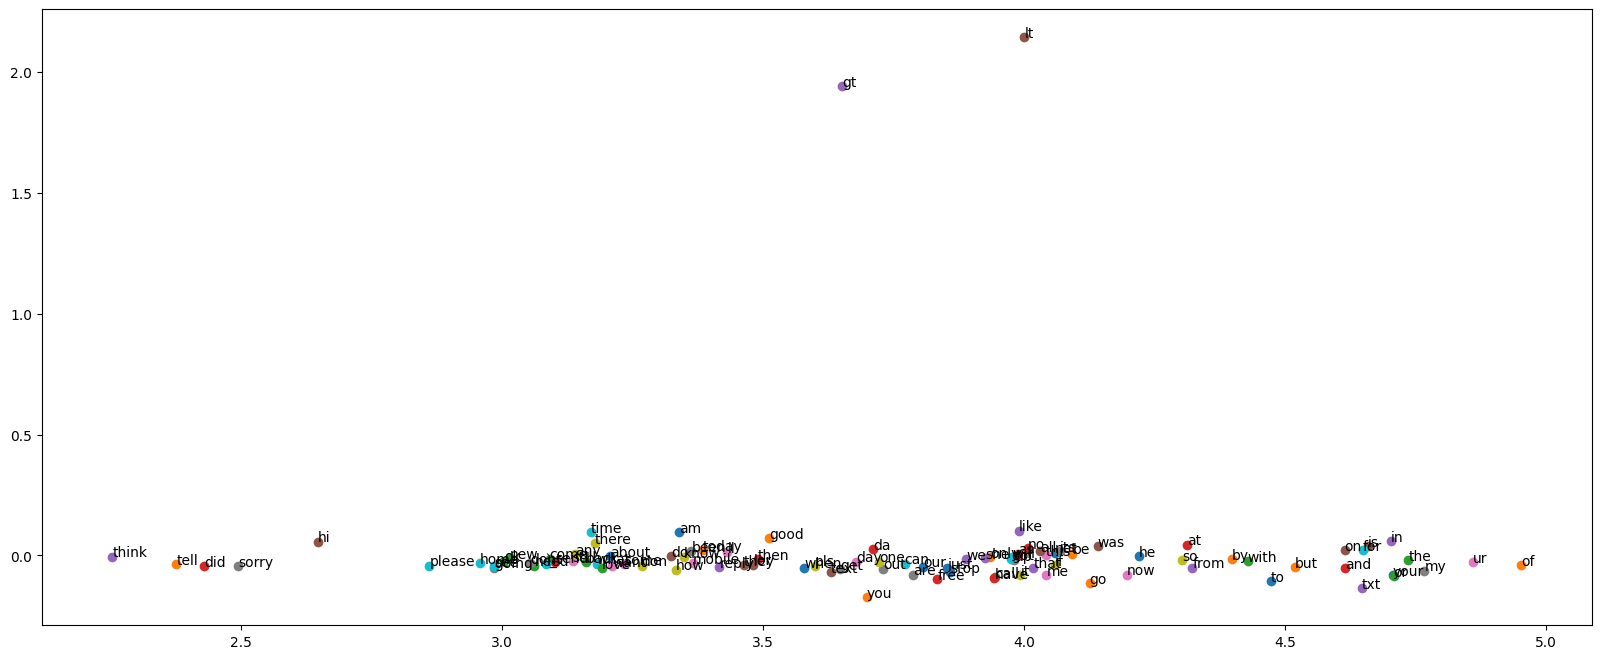

In [ ]:
# For PCA with 2 Principal Component Vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20,8))

# for i, word in enumerate(target_words):
for i, word in enumerate(vocab[:100]):   # Plotting only till 100 Words to better understand the plottings
    plt.scatter(x=result[i,0], y=result[i,1])
    plt.annotate(word, xy=(result[i,0], result[i,1]))

# plt.show()

In [14]:
type(X_test)

pandas.core.series.Series

In [15]:
X_test

3245    [funny, fact, nobody, teaches, volcanoes, erupt, tsunamis, arise, hurricanes, sway, aroundn, no,...
944     [sent, my, scores, to, sophas, and, had, to, do, secondary, application, for, few, schools, thin...
1044       [we, know, someone, who, you, know, that, fancies, you, call, to, find, out, who, pobox, ls, hb]
2484    [only, if, you, promise, your, getting, out, as, soon, as, you, can, and, you, ll, text, me, in,...
812     [congratulations, ur, awarded, either, of, cd, gift, vouchers, free, entry, our, weekly, draw, t...
                                                       ...                                                 
4264    [lt, decimal, gt, but, its, not, common, car, here, so, its, better, to, buy, from, china, or, a...
2439                   [rightio, it, is, then, well, arent, we, all, up, bright, and, early, this, morning]
5556                                      [yes, have, so, that, why, texted, pshew, missing, you, so, much]
4205                        

### Prep Word Vectors

In [16]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key])
                     for ls in X_test])

<ipython-input-16-480035c5f48f>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key])


In [17]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

20 10
38 31
17 16
29 29
23 23
9 8
7 7
6 6
21 20
5 4
15 14
20 19
6 5
7 7
9 8
9 9
4 3
14 14
5 5
8 8
12 11
23 8
8 5
11 10
25 25
23 22
15 14
9 8
6 6
4 4
18 18
10 9
24 20
11 9
19 18
24 23
4 4
26 25
5 5
17 13
50 44
9 8
25 25
8 7
16 16
8 6
14 12
6 5
6 5
20 19
26 24
5 1
20 20
14 13
7 7
11 11
14 13
4 3
7 2
12 12
7 7
24 20
8 8
9 9
27 25
8 8
21 19
6 6
20 18
18 18
4 4
3 2
11 9
26 26
18 15
22 20
46 40
10 9
7 7
101 101
5 5
4 2
1 1
13 3
7 5
6 6
28 18
9 9
14 14
24 23
16 13
8 6
12 11
2 2
4 4
17 13
12 12
5 5
5 5
8 5
4 4
6 6
2 2
11 11
10 10
7 6
28 26
14 14
7 7
6 5
4 4
5 4
12 11
8 8
4 4
3 3
7 6
30 25
14 13
15 15
3 3
12 10
20 18
22 18
58 53
5 4
28 26
31 29
29 29
19 19
13 13
5 5
25 23
26 26
10 10
14 14
31 30
11 11
18 17
6 5
5 5
6 6
10 10
25 25
6 6
10 7
37 32
19 17
26 24
25 22
10 10
4 4
16 16
4 4
10 10
10 10
9 5
25 22
8 8
7 6
10 8
27 6
14 11
22 20
6 6
20 19
21 21
20 19
14 13
22 19
9 8
18 15
10 9
40 36
5 5
6 6
20 17
11 10
7 7
3 3
17 16
8 6
21 21
1 1
11 11
6 3
21 21
4 4
12 10
7 6
13 13
6 5
8 8
5 5
1 1
16 14
30

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect)!=0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [ ]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

20 100
38 100
17 100
29 100
23 100
9 100
7 100
6 100
21 100
5 100
15 100
20 100
6 100
7 100
9 100
9 100
4 100
14 100
5 100
8 100
12 100
23 100
8 100
11 100
25 100
23 100
15 100
9 100
6 100
4 100
18 100
10 100
24 100
11 100
19 100
24 100
4 100
26 100
5 100
17 100
50 100
9 100
25 100
8 100
16 100
8 100
14 100
6 100
6 100
20 100
26 100
5 100
20 100
14 100
7 100
11 100
14 100
4 100
7 100
12 100
7 100
24 100
8 100
9 100
27 100
8 100
21 100
6 100
20 100
18 100
4 100
3 100
11 100
26 100
18 100
22 100
46 100
10 100
7 100
101 100
5 100
4 100
1 100
13 100
7 100
6 100
28 100
9 100
14 100
24 100
16 100
8 100
12 100
2 100
4 100
17 100
12 100
5 100
5 100
8 100
4 100
6 100
2 100
11 100
10 100
7 100
28 100
14 100
7 100
6 100
4 100
5 100
12 100
8 100
4 100
3 100
7 100
30 100
14 100
15 100
3 100
12 100
20 100
22 100
58 100
5 100
28 100
31 100
29 100
19 100
13 100
5 100
25 100
26 100
10 100
14 100
31 100
11 100
18 100
6 100
5 100
6 100
10 100
25 100
6 100
10 100
37 100
19 100
26 100
25 100
10 100
4 100
1

## Doc2Vec

### Train own model

In [ ]:
# Read in data, clean it, and then split into train and test sets
# import gensim
# import pandas as pd
# from sklearn.model_selection import train_test_split
# pd.set_option('display.max_colwidth', 100)

df_messages = pd.read_csv('./data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
df_messages['text_clean'] = df_messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(df_messages['text_clean'],
                                                    df_messages['label'], test_size=0.2, random_state=42)

In [ ]:
# Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [ ]:
# Look at what a tagged document looks like
tagged_docs[0]

TaggedDocument(words=['no', 'in', 'the', 'same', 'boat', 'still', 'here', 'at', 'my', 'moms', 'check', 'me', 'out', 'on', 'yo', 'half', 'naked'], tags=[0])

In [ ]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [ ]:
# What happens if we pass in a list of words?
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([-1.64731927e-02,  6.73724618e-03,  7.42119178e-03, -7.24918069e-03,
        3.30148335e-03, -2.83203982e-02,  5.52653102e-03,  4.96418551e-02,
       -2.28830818e-02, -1.35454154e-02, -1.77494064e-02, -2.63272151e-02,
        3.15064448e-03,  1.82892457e-02,  2.20148498e-03, -2.48654801e-02,
        8.38757865e-03, -2.12437082e-02, -5.44351293e-03, -3.86930220e-02,
        1.65814231e-03,  1.54767269e-02,  1.81065165e-02, -8.54273140e-03,
        4.28806571e-03, -4.62703686e-03, -1.68680474e-02, -9.46519524e-03,
       -1.99299362e-02, -3.81140970e-03,  1.95531342e-02,  9.21498612e-03,
        1.48466714e-02, -1.14874914e-02, -1.25037786e-02,  2.48058587e-02,
        1.76991569e-03, -2.14365497e-02, -1.36423195e-02, -3.75148207e-02,
       -2.81903846e-03, -1.62277296e-02,  6.37596799e-03, -7.79511360e-03,
        2.13076733e-02, -7.98095204e-03, -1.28957173e-02, -1.87858921e-02,
        1.43808592e-02,  1.82786025e-02,  8.68128799e-03, -1.20550990e-02,
       -3.85324983e-03, -

### Prep doc vectors

In [ ]:
# How do we prepare these vectors to be used in a machine learning model?
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [ ]:
vectors[0]

[array([-0.04744761,  0.01606006,  0.03598702, -0.00373216,  0.00614602,
        -0.0966343 ,  0.0043738 ,  0.16557075, -0.07898993, -0.03734802,
        -0.04572977, -0.0828405 , -0.01128957,  0.0521557 ,  0.00268942,
        -0.07707468,  0.03367252, -0.07618967,  0.01926175, -0.12226734,
        -0.00200001,  0.04987846,  0.03770627, -0.02021136,  0.01591962,
         0.00404599, -0.06585995, -0.01958635, -0.05193201, -0.01255579,
         0.05568629,  0.01969392,  0.04761507, -0.02860966, -0.05086218,
         0.07986753,  0.01780258, -0.08971848, -0.04638259, -0.10610212,
        -0.00788532, -0.04929524,  0.00721249, -0.04673539,  0.04197586,
        -0.02815232, -0.03452308, -0.05860712,  0.0487173 ,  0.05784895,
         0.04714223, -0.02836895, -0.00920646, -0.02090294, -0.02146838,
         0.04592196,  0.03698343, -0.00385681, -0.05588821,  0.02534406,
         0.00477492, -0.00242368,  0.00904486, -0.05076563, -0.10716826,
         0.07179954,  0.01346165,  0.05897297, -0.0

## RNN

In [ ]:
!pip install scikit-learn


  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

df_messages = pd.read_csv('./data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
labels = np.where(df_messages['label']=='spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(df_messages['text'],
                                                    labels, test_size=0.2, random_state=42)

In [ ]:
# !pip install keras

In [ ]:
# !pip list

In [ ]:
# Import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq[0]

[38,
 30,
 8,
 5,
 273,
 1989,
 81,
 116,
 26,
 11,
 1656,
 322,
 10,
 53,
 18,
 299,
 30,
 349,
 1990]

In [ ]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [ ]:
# What do these padded sequences look like?
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   38,   30,
          8,    5,  273, 1989,   81,  116,   26,   11, 1656,  322,   10,
         53,   18,  299,   30,  349, 1990])

### Build Model

In [ ]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [ ]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          254560    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 263,969
Trainable params: 263,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [ ]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 10s 42ms/step - loss: 0.2393 - accuracy: 0.9174 - precision_m: 0.5140 - recall_m: 0.4268 - val_loss: 0.0783 - val_accuracy: 0.9776 - val_precision_m: 0.9810 - val_recall_m: 0.8542
Epoch 2/10
140/140 [==============================] - 5s 35ms/step - loss: 0.0291 - accuracy: 0.9924 - precision_m: 0.9756 - recall_m: 0.9558 - val_loss: 0.0600 - val_accuracy: 0.9821 - val_precision_m: 0.9905 - val_recall_m: 0.8764
Epoch 3/10
140/140 [==============================] - 5s 39ms/step - loss: 0.0124 - accuracy: 0.9966 - precision_m: 0.9590 - recall_m: 0.9463 - val_loss: 0.0706 - val_accuracy: 0.9812 - val_precision_m: 0.9810 - val_recall_m: 0.8728
Epoch 4/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0016 - accuracy: 0.9998 - precision_m: 0.9786 - recall_m: 0.9777 - val_loss: 0.0829 - val_accuracy: 0.9821 - val_precision_m: 0.9690 - val_recall_m: 0.8892
Epoch 5/10
140/140 [==============================] - 5s 34ms/step 

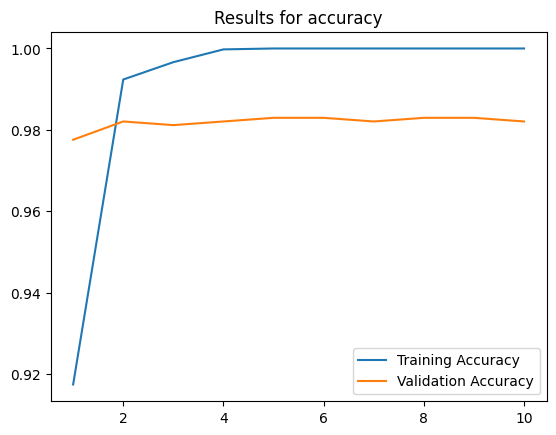

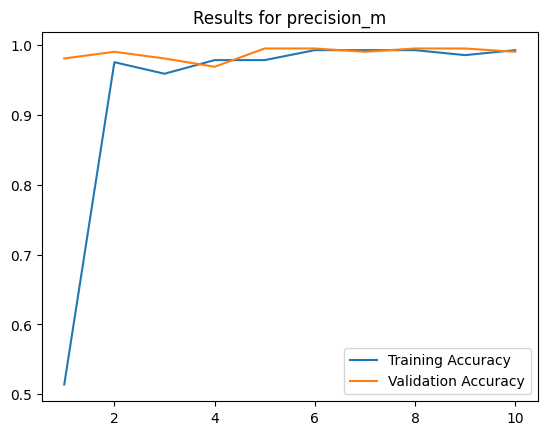

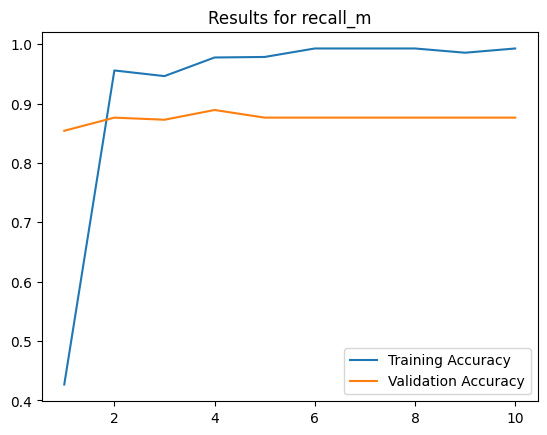

In [ ]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

## Compare NLP Techniques

### Read & Preprocess Text

In [19]:
# Read in and clean data
import nltk
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import string

stopwords = nltk.corpus.stopwords.words('english')

df_messages = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding='latin-1')
df_messages = df_messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df_messages.columns = ["label", "text"]
df_messages['label'] = np.where(df_messages['label']=='spam', 1, 0)

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

df_messages['clean_text'] = df_messages['text'].apply(lambda x: clean_text(x))
df_messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [20]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_messages['clean_text'],
                                                    df_messages['label'], test_size=0.2, random_state = 42)

In [24]:
# Let's save the training and test sets to ensure we are using the same data for each model
X_train.to_csv('/content/drive/MyDrive/data/X_train.csv', index=False, header=True)
X_test.to_csv('/content/drive/MyDrive/data/X_test.csv', index=False, header=True)
y_train.to_csv('/content/drive/MyDrive/data/y_train.csv', index=False, header=True)
y_test.to_csv('/content/drive/MyDrive/data/y_test.csv', index=False, header=True)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv('/content/drive/MyDrive/data/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/data/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/data/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/data/y_test.csv')

X_train.head()

,clean_text
0,"['im', 'boat', 'still', 'moms', 'check', 'yo', 'im', 'half', 'naked']"
1,"['bank', 'granite', 'issues', 'strongbuy', 'explosive', 'pick', 'members', '300', 'nasdaq', 'sym..."
2,"['r', 'giving', 'second', 'chance', 'rahul', 'dengra']"
3,"['played', 'smash', 'bros', 'ltgt', 'religiously']"
4,"['private', '2003', 'account', 'statement', '07973788240', 'shows', '800', 'unredeemed', 'points..."


### Create TF-IDF vectors

In [ ]:
# Instantiate and fit a TFIDF vectorizer and then use that trained vectorizer
# to transform the messages in the training and test sets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])
X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [ ]:
# What words did the vectorizer learn?
tfidf_vect.vocabulary_

{'im': 3820,
 'boat': 1494,
 'still': 6861,
 'moms': 4831,
 'check': 1863,
 'yo': 8187,
 'half': 3476,
 'naked': 4952,
 'bank': 1295,
 'granite': 3397,
 'issues': 3956,
 'strongbuy': 6906,
 'explosive': 2876,
 'pick': 5516,
 'members': 4690,
 '300': 461,
 'nasdaq': 4966,
 'symbol': 7052,
 'cdgt': 1804,
 '500': 583,
 'per': 5463,
 'giving': 3306,
 'second': 6323,
 'chance': 1829,
 'rahul': 5883,
 'dengra': 2378,
 'played': 5561,
 'smash': 6604,
 'bros': 1602,
 'ltgt': 4496,
 'religiously': 6023,
 'private': 5749,
 '2003': 373,
 'account': 852,
 'statement': 6832,
 '07973788240': 40,
 'shows': 6488,
 '800': 692,
 'unredeemed': 7579,
 'points': 5612,
 'call': 1693,
 '08715203649': 113,
 'identifier': 3800,
 'code': 1991,
 '40533': 524,
 'expires': 2871,
 '311004': 472,
 'says': 6280,
 'never': 5020,
 'answer': 1053,
 'texts': 7187,
 'confirmdeny': 2077,
 '88066': 762,
 'lost': 4451,
 '3pound': 506,
 'help': 3570,
 'okey': 5230,
 'dokey': 2537,
 'bit': 1442,
 'sorting': 6698,
 'stuff': 692

In [ ]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

### Fit Random Forest Classifier on top of Vectors

In [ ]:
# Fit a basic Random Forest model on these vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect)

In [ ]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.827 / Accuracy: 0.977


**So in hundred percent precision means that when the model identified a text message in the test set as spam, it actually was spam 100% of the time. 82.7% recall means that, of the title messages in the test set that were labeled as spam, the model correctly identified 79.6% of them. In other words, the other 18.3% of them, the model thought was not spam. Lastly, 97.3% accuracy, just means that whether the model predicted spam or not, it was correct 97.3% of the time.**

### Create Word2Vec Vectors

In [ ]:
import gensim
import numpy as np
import pandas as pd

In [21]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [22]:
words = set(w2v_model.wv.index_to_key)

In [27]:
X_train['clean_text']

0                                     ['im', 'boat', 'still', 'moms', 'check', 'yo', 'im', 'half', 'naked']
1       ['bank', 'granite', 'issues', 'strongbuy', 'explosive', 'pick', 'members', '300', 'nasdaq', 'sym...
2                                                    ['r', 'giving', 'second', 'chance', 'rahul', 'dengra']
3                                                        ['played', 'smash', 'bros', 'ltgt', 'religiously']
4       ['private', '2003', 'account', 'statement', '07973788240', 'shows', '800', 'unredeemed', 'points...
                                                       ...                                                 
4452                                 ['came', 'hostel', 'going', 'sleep', 'plz', 'call', 'class', 'hrishi']
4453                                                                      ['sorry', 'ill', 'call', 'later']
4454                                                  ['prabhaim', 'sorydarealyfrm', 'heart', 'im', 'sory']
4455                        

In [28]:
# Replace the words in each text message with the learned word vector
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train['clean_text']])

X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test['clean_text']])


<ipython-input-28-8820e8bc26d9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train['clean_text']])
<ipython-input-28-8820e8bc26d9>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test['clean_text']])


In [29]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

### Fit Random Forest Classifier on Top of Word2Vec vectors

In [30]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [31]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [32]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.982 / Recall: 0.747 / Accuracy: 0.964


### Create doc2vec vectors

In [33]:
# Created TaggedDocument vectors for each text message in the training and test sets
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i])
                     for i, v in enumerate(X_train['clean_text'])]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i])
                    for i, v in enumerate(X_test['clean_text'])]

In [34]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs_train,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [35]:
# Infer the vectors to be used in training and testing
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]   

### Fit RF classifier on top of doc2vec vectors

In [36]:
# Fit a basic model, make predictions on the holdout test set, and the generate the evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

rf = RandomForestClassifier()
rf_model = rf.fit(train_vectors, y_train.values.ravel())

y_pred = rf_model.predict(test_vectors)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.952 / Recall: 0.393 / Accuracy: 0.916
